# Importing pretrained HD pix2pix :) and fine-tuning on our data

https://github.com/NVIDIA/pix2pixHD

In [3]:
!git clone https://github.com/NVIDIA/pix2pixHD

Cloning into 'pix2pixHD'...
remote: Enumerating objects: 340, done.
remote: Total 340 (delta 0), reused 0 (delta 0), pack-reused 340
Receiving objects: 100% (340/340), 55.68 MiB | 9.68 MiB/s, done.
Resolving deltas: 100% (156/156), done.
Checking out files: 100% (115/115), done.


In [1]:
import os
os.getcwd()

'/users/riya/race/HDgancode'

In [2]:
os.chdir("/users/riya/race/HDgancode")

In [3]:
import PIL
from PIL import Image
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import shutil
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import shutil

## Background Knowledge

Ok. So from the ReadME, lots of interesting stuff to unpack. First of all, the paper suggests that this is novel in a few ways, one being considering label maps and boundary maps. First, I want to try without those, but perhaps that is something useful to create for retinal segmentations. Like boundaries being boundaries around vessels and label maps, or just label maps. 

The thing is: I only tried edeges2shoes, where this was an immediately fill in the color. The model considered the vessels to be edges, but maybe that's false, because really you're filling in the area around the edges, more like label to streetview perhaps. Honestly, that could help the model, but we're really no using the label/instance maps wisely in this context. If this training does not go well, I will try to make some label and instance maps.

Eventually I could try label mapping maybe with vessel sizes? That could be a smart strategy. Eventually I shall try.

This is unlike the pix2pix with this instance map inclusion as well. 

Also, default setting is scale_width, I guess I'll go for it! all will be scaled to 1024 so not bad. Also will only be training on 1 GPU.

## Moving the Data

As am trying, just working with black dataset right now. If bad results after trying new preprocessing methods, can try using the white dataset here since it has around 1000 more images! (quite a lot more!). Once I get everything working, I'll make a list of new preprocessing methods I want to try.

Based on the fact that for this overnight training, I will not be using instance maps, label maps (trying out that stuff), my data should actually all be in order right now for the most part. I do have to move around some stuff though, which I will go ahead and do.

In [4]:
old_data_dir = "/users/riya/race/gandataset/"
data_dir = "/users/riya/race/gandataset/HDgan/"

In [5]:
def move_data(old_data_dir, data_dir):
    
    def data_section(old_path, new_path):
        intermediate = old_data_dir + old_path
        
        for i in os.listdir(intermediate):
            a = shutil.copy(intermediate + i, data_dir + new_path + i)
    
    data_section("A/train/", "train_A/")
    data_section("A/test/", "test_A/")
    
    data_section("B/train/", "train_B/")
    data_section("B/test/", "test_B/")

In [29]:
move_data(old_data_dir, data_dir)

In [6]:
len(os.listdir(data_dir + "train_A/")), len(os.listdir(data_dir + "train_B/")) # grt! right here I have all the black images

(1623, 1623)

In [7]:
len(os.listdir(data_dir + "test_A/")), len(os.listdir(data_dir + "test_B/")) # grt! right here I have all the test images

(86, 86)

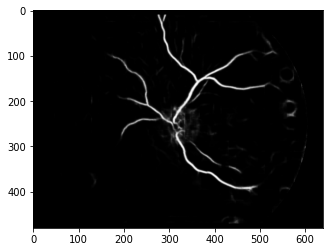

In [8]:
# looking at # of channels in image

img = mpimg.imread("/users/riya/race/gandataset/HDgan/train_A/91945.bmp")
imgplot = plt.imshow(img, cmap='gray')
plt.show()

In [10]:
img.shape

(480, 640)

In [12]:
img.size

307200

In [13]:
from PIL import Image
testimg = Image.open("/users/riya/race/gandataset/HDgan/train_A/91945.bmp")

In [15]:
testimg.size

(640, 480)

In [16]:
testimg.mode

'L'

## Resize Images to Explicitly Only Have 1 Channel

## Pairing Images

Don't need to do this, it appears.